<h1 style = "font-size:3rem;color:DarkCyan">Feature Comparison between audio files</h1>

In [25]:
#import libraries

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import librosa                  
import librosa.display 
import IPython.display as ipd
import scipy
import os

In [2]:
# import dataset, in this case different percussion sounds

filenames = os.listdir('./data')
print(f'Number of audio files: {len(filenames)} ')


Number of audio files: 167 


Extracting features (Bandwidth and central spectroid) for each audio file in two ways:
- slice the first x ms of each sample, with x the shortest sample
- take the whole sample and zero pad to the longest sample

In [3]:
# find the length of the smalles and longest samples
sr = 48000
shortest = sr * 5
longest = 0

for name in filenames:
    tmp_data, dummy = librosa.load('./data/'+name, sr = sr, mono=True)
    
    data_length = len(tmp_data)
    if data_length > longest:
        longest = data_length
    elif data_length < shortest:
        shortest = data_length
        
print(f'shortest size = {shortest} samples, or {shortest / sr} ms')
print(f'longest size = {longest} samples, or {longest / sr} ms')

shortest size = 4462 samples, or 0.09295833333333334 ms
longest size = 923588 samples, or 19.241416666666666 ms


In [4]:
a = [1, 2, 3, 4, 5]
a = np.pad(a, (0, 13), 'constant', constant_values=(0, 0))
print(a)

[1 2 3 4 5 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
def extract_features(data):
    return [
        np.mean(librosa.feature.spectral_centroid(y = data)),
        np.mean(librosa.feature.spectral_bandwidth(y = data)),
        np.mean(librosa.feature.zero_crossing_rate(y = data)),
        np.var(librosa.feature.spectral_centroid(y = data)),
        np.var(librosa.feature.spectral_bandwidth(y = data)),
        np.var(librosa.feature.zero_crossing_rate(y = data)),
    ]

#np.mean(librosa.feature.zero_crossing_rate(y = data)),

In [6]:
def get_label(name):
    if name.find('clap') != -1:
        return 1
    elif name.find('cymbal') != -1:
        return 2
    elif name.find('kick') != -1:
        return 3
    else:
        return 4

In [49]:
sr = 48000
features = np.zeros((len(filenames), 6))
predictions = np.zeros(len(filenames))
#feature2=np.zeros((len(filenames), 3))
idx = 0

for name in filenames:
    # load 400 ms of the audio file
    
    data, dummy = librosa.load('./data/'+name, sr = sr, duration=20, mono=True)
    
    # fill prediction array with correct label 
    predictions[idx] = get_label(name)
    
    features[idx] = extract_features(data)
    
    # zero padding
    #data, dummy = librosa.load('./data/'+name, sr = sr, mono=True)
    #data_length = len(data)
    #zero_pad_length = longest - data_length
    
    #data = np.pad(data, (0, zero_pad_length), 'constant', constant_values=(0, 0))
    
    #tmp_features =  extract_features(data)
    #feature2[idx, 0] = tmp_features[0]
    #feature2[idx, 1] = tmp_features[1]
    
    idx +=1
    

<IPython.core.display.Javascript object>


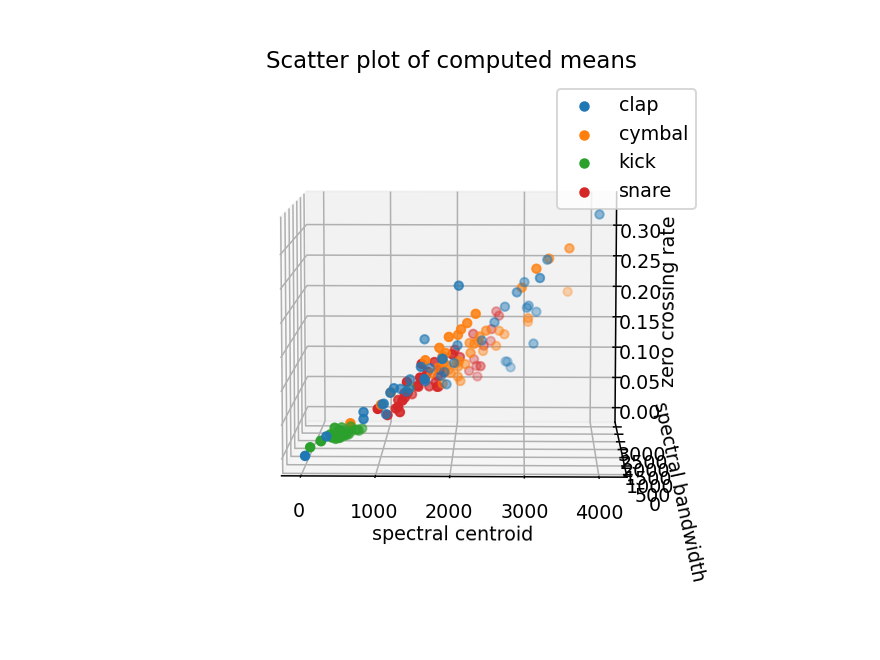

In [52]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(predictions == 1),0], features[np.where(predictions == 1),1], features[np.where(predictions == 1),2], label = 'clap')
ax.scatter3D(features[np.where(predictions == 2),0], features[np.where(predictions == 2),1], features[np.where(predictions == 2),2], label = 'cymbal')
ax.scatter3D(features[np.where(predictions == 3),0], features[np.where(predictions == 3),1], features[np.where(predictions == 3),2], label = 'kick')
ax.scatter3D(features[np.where(predictions == 4),0], features[np.where(predictions == 4),1], features[np.where(predictions == 4),2], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel('spectral centroid')
ax.set_ylabel('spectral bandwidth')
ax.set_zlabel('zero crossing rate')
ax.legend()
#ax.tight_layout()

<IPython.core.display.Javascript object>


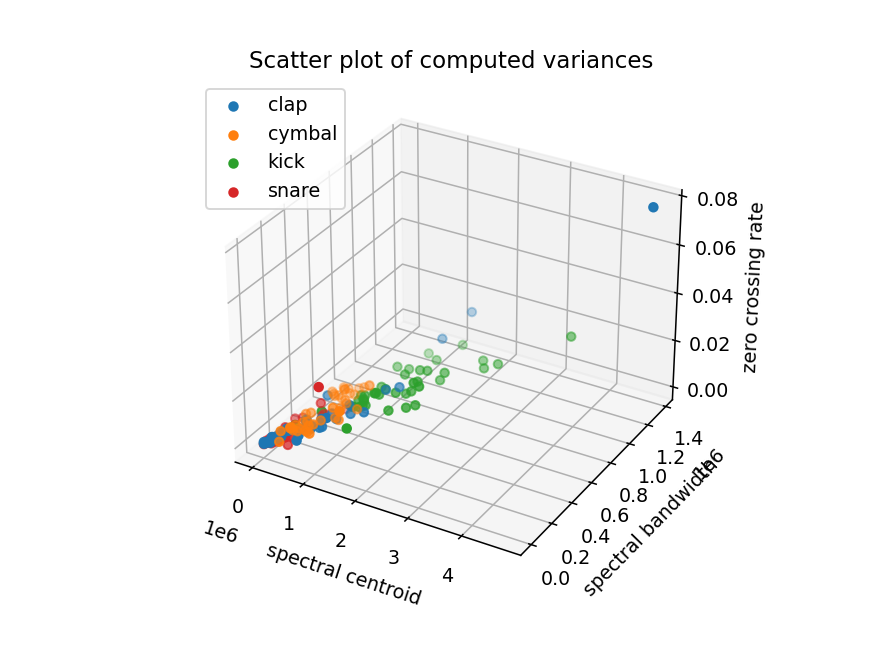

In [53]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(predictions == 1),3], features[np.where(predictions == 1),4], features[np.where(predictions == 1),5], label = 'clap')
ax.scatter3D(features[np.where(predictions == 2),3], features[np.where(predictions == 2),4], features[np.where(predictions == 2),5], label = 'cymbal')
ax.scatter3D(features[np.where(predictions == 3),3], features[np.where(predictions == 3),4], features[np.where(predictions == 3),5], label = 'kick')
ax.scatter3D(features[np.where(predictions == 4),3], features[np.where(predictions == 4),4], features[np.where(predictions == 4),5], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed variances')
ax.set_xlabel('spectral centroid')
ax.set_ylabel('spectral bandwidth')
ax.set_zlabel('zero crossing rate')
ax.legend()
#ax.tight_layout()